<a href="https://colab.research.google.com/github/Swastik3025/mnist-dataset/blob/main/mnist_digit_classification_using_SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

import warnings
warnings.filterwarnings('ignore')


In [8]:
from sklearn.datasets import load_digits
mnist=load_digits() # creating the instance of load_digits dict

In [9]:
# knowing about the keys of the dict / dataset mnist
dir(mnist)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

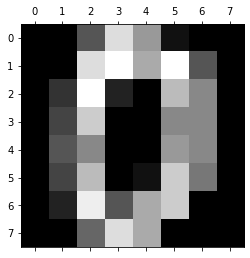

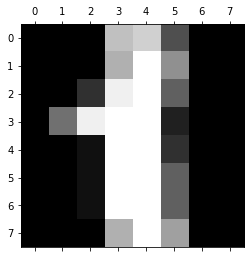

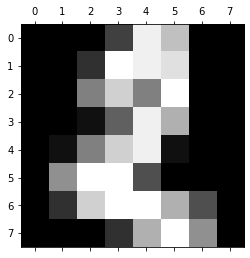

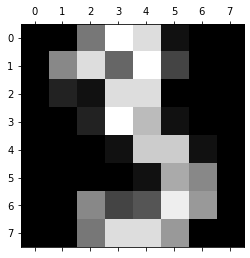

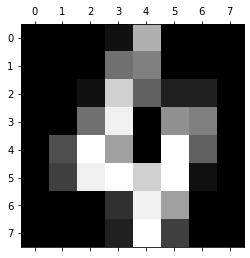

In [10]:
# visualizing the first 5 digits of the dataset
plt.gray()
for i in range(5):
  plt.matshow(mnist.images[i])

In [11]:
# extracting the input data and the corr. target values
X,y=mnist["data"],mnist["target"]
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [12]:
X[0]
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

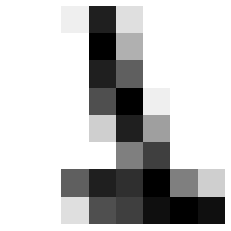

In [13]:
import matplotlib

# visualize the imput data
some_digit=X[1000] # is a 1d array
# reshaping the array as 8x8 (images in the dataset are 8x8 pixels)
some_digit_image=some_digit.reshape(8,8)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [14]:
# moving towards model training

# train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [15]:
X_train.shape

(1527, 64)

In [16]:
y_train.shape

(1527,)

In [17]:
# X_train is a 2d array with each row as a 64 sized array containing the pixel densities

In [18]:
shuffle_index=np.random.permutation(1527) # for generating random X_train and y_train sets
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

# above result can also be achieved by passing a parameter random_state in the function train_test_split

In [19]:
y_train_1=(y_train==1) # train set with target labels as '1'
y_test_1=(y_test==1) # test set with target labels as '1'

# we get y_train_1, y_test_1 as boolean array

# print(y_train_1)
# print(y_test_1)

In [20]:
# training the model for just classifying the digit '1'

# using a Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_1)

SGDClassifier(random_state=42)

In [21]:
# some_digit=X[1000]
sgd_clf.predict([some_digit])

array([ True])

In [22]:
# instantiate the model
sgd_clf1=SGDClassifier(random_state=45)
sgd_clf1.fit(X_train,y_train)

SGDClassifier(random_state=45)

In [23]:
sgd_clf1.predict([some_digit])

array([1])

In [24]:
score = sgd_clf1.score(X_test,y_test)
print(f"The score is {score.round(8)}")

The score is 0.94814815


In [25]:
# it may happen that the model has overfit the data, so to get a generalised performance of the model, we perform k fold (stratified) cross validation
# stratified here means keeping the number ratio of different classes/features same across sub samples taken (preserving the percentage of samples for each class)

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [26]:
skfolds=StratifiedKFold(n_splits=5,shuffle=True,random_state=45)

scores = []

for train_index,test_index in skfolds.split(X_train,y_train):
  clone_clf=clone(sgd_clf1) # copy the model and train it every time for each fold
  X_train_folds=X_train[train_index]
  y_train_folds=y_train[train_index]
  X_test_fold=X_train[test_index]
  y_test_fold=y_train[test_index]
  clone_clf.fit(X_train_folds,y_train_folds)
  y_pred=clone_clf.predict(X_test_fold)
  n_correct=sum(y_pred==y_test_fold)
  scores.append((n_correct/len(y_pred)).round(8)) # n_correct/len(y_pred) gives the ratio of correct predictions

print(f"Scores:{scores}")

Scores:[0.97058824, 0.96732026, 0.96065574, 0.9442623, 0.92131148]


In [27]:
# above code can be greatly simplified using cross_val_score from sklearn.model_selection

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(sgd_clf1,X_train,y_train,cv=5,scoring='accuracy')

print(f"Average model score: {cv_score.mean().round(8)}")

Average model score: 0.95153327


In [28]:
# predicting the output in consideration with the cross validation performance of the model

from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf1,X_train,y_train,cv=3)
y_train_pred

array([7, 1, 5, ..., 7, 9, 5])

In [29]:
# plot the confusion matrix to better evaluate the model performance

from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_train,y_train_pred)
cf

array([[147,   0,   0,   0,   1,   0,   0,   1,   0,   0],
       [  0, 138,   1,   1,   2,   1,   3,   0,  10,   1],
       [  0,   1, 142,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 149,   0,   3,   0,   1,   4,   2],
       [  1,   0,   0,   0, 152,   0,   1,   0,   0,   2],
       [  0,   0,   0,   0,   0, 149,   1,   1,   0,   3],
       [  0,   1,   1,   0,   1,   0, 150,   0,   4,   0],
       [  0,   1,   0,   0,   0,   0,   0, 146,   0,   3],
       [  0,   6,   3,   3,   1,   0,   2,   0, 135,   0],
       [  0,   3,   0,   0,   0,   1,   0,   4,   8, 136]], dtype=int64)

Text(51.0, 0.5, 'Actual')

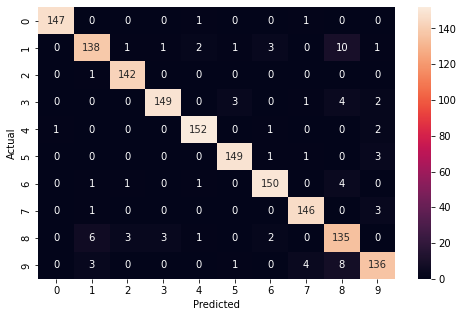

In [30]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(cf,annot=True,fmt=',d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [31]:
from sklearn.metrics import classification_report

report = classification_report(y_train,y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       149
           1       0.92      0.88      0.90       157
           2       0.97      0.99      0.98       143
           3       0.97      0.94      0.96       159
           4       0.97      0.97      0.97       156
           5       0.97      0.97      0.97       154
           6       0.96      0.96      0.96       157
           7       0.95      0.97      0.96       150
           8       0.84      0.90      0.87       150
           9       0.93      0.89      0.91       152

    accuracy                           0.95      1527
   macro avg       0.95      0.95      0.95      1527
weighted avg       0.95      0.95      0.95      1527



In [32]:
# now, testing our model on test data

model_score = sgd_clf1.score(X_test, y_test)
print(f"Model score on test data: {model_score.round(8)}")

Model score on test data: 0.94814815


In [33]:
y_test_pred = sgd_clf1.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_test_pred)
cf

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 22,  0,  2,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 23,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 24,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0, 24,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  1,  1, 19,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  0, 26]], dtype=int64)

Text(51.0, 0.5, 'Actual')

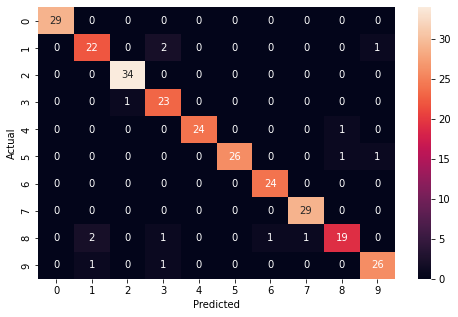

In [35]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(cf,annot=True,fmt=',d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [36]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.88      0.88      0.88        25
           2       0.97      1.00      0.99        34
           3       0.85      0.96      0.90        24
           4       1.00      0.96      0.98        25
           5       1.00      0.93      0.96        28
           6       0.96      1.00      0.98        24
           7       0.97      1.00      0.98        29
           8       0.90      0.79      0.84        24
           9       0.93      0.93      0.93        28

    accuracy                           0.95       270
   macro avg       0.95      0.94      0.94       270
weighted avg       0.95      0.95      0.95       270



In [37]:
# let us try some other models on our dataset

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression":LogisticRegression(),
    "SGDClassifier":SGDClassifier(),
    "SVM Classifier":SVC(),
    "DecisionTree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "XGBoost Classifier":XGBClassifier(),
}

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

def eval_model(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    accuracy = accuracy_score(y_true, y_pred)

    Classification_report = classification_report(y_true, y_pred)

    return cm, accuracy, Classification_report


In [39]:
model_list = []
accuracy_list = []

for i in range(len(list(models))):
    # model training
    model = list(models.values())[i] # list(models.values()) is a list having instances of the models
    model.fit(X_train, y_train)

    # model testing
    y_pred_train = model.predict(X_train)

    # model performance
    model_cm, model_accuracy, model_classification_report = eval_model(y_train, y_pred_train)

    # printing the results
    print("\n")
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for train set")
    print(f"- Confusion Matrix:\n{model_cm}")
    print(f"- Accuracy: {model_accuracy}")
    print(f"- Model Classification Report:\n {model_classification_report}")

    print("---------------------------------------------")

    accuracy_list.append(model_accuracy)




Logistic Regression
Model performance for train set
- Confusion Matrix:
[[149   0   0   0   0   0   0   0   0   0]
 [  0 157   0   0   0   0   0   0   0   0]
 [  0   0 143   0   0   0   0   0   0   0]
 [  0   0   0 159   0   0   0   0   0   0]
 [  0   0   0   0 156   0   0   0   0   0]
 [  0   0   0   0   0 154   0   0   0   0]
 [  0   0   0   0   0   0 157   0   0   0]
 [  0   0   0   0   0   0   0 150   0   0]
 [  0   0   0   0   0   0   0   0 150   0]
 [  0   0   0   0   0   0   0   0   0 152]]
- Accuracy: 1.0
- Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       157
           2       1.00      1.00      1.00       143
           3       1.00      1.00      1.00       159
           4       1.00      1.00      1.00       156
           5       1.00      1.00      1.00       154
           6       1.00      1.00      1.00       157
           7  

In [40]:
train_result = pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

In [41]:
train_result

,Model Name,Accuracy
0,Logistic Regression,1.000000
3,DecisionTree,1.000000
4,Random Forest,1.000000
5,XGBoost Classifier,1.000000
2,SVM Classifier,0.998035
1,SGDClassifier,0.986902


In [42]:
# check performance on test set

test_model_list = []
test_accuracy_list = []

for i in range(len(list(models))):

    model = list(models.values())[i]
    # model testing
    y_pred_test = model.predict(X_test)

    # model performance
    test_model_cm, test_model_accuracy, test_model_classification_report = eval_model(y_test, y_pred_test)

    # printing the results
    print("\n")
    print(list(models.keys())[i])
    test_model_list.append(list(models.keys())[i])

    print("Model performance for test set")
    print(f"- Confusion Matrix:\n{test_model_cm}")
    print(f"- Accuracy: {test_model_accuracy}")
    print(f"- Model Classification Report:\n {test_model_classification_report}")

    print("---------------------------------------------")

    test_accuracy_list.append(test_model_accuracy)




Logistic Regression
Model performance for test set
- Confusion Matrix:
[[29  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  1]
 [ 0  1 32  0  0  0  0  0  1  0]
 [ 0  0  0 21  0  2  0  0  1  0]
 [ 0  0  0  0 24  0  0  0  1  0]
 [ 0  0  0  0  1 26  0  0  0  1]
 [ 0  0  0  0  0  0 24  0  0  0]
 [ 0  0  0  1  0  0  0 28  0  0]
 [ 0  2  0  0  1  0  0  0 21  0]
 [ 0  1  0  0  0  0  0  0  0 27]]
- Accuracy: 0.9481481481481482
- Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.86      0.96      0.91        25
           2       1.00      0.94      0.97        34
           3       0.95      0.88      0.91        24
           4       0.92      0.96      0.94        25
           5       0.93      0.93      0.93        28
           6       1.00      1.00      1.00        24
           7       1.00      0.97      0.98        29
           8       0.88      0.88      0.88   

In [43]:
test_result = pd.DataFrame(list(zip(test_model_list, test_accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

In [44]:
train_result

,Model Name,Accuracy
0,Logistic Regression,1.000000
3,DecisionTree,1.000000
4,Random Forest,1.000000
5,XGBoost Classifier,1.000000
2,SVM Classifier,0.998035
1,SGDClassifier,0.986902


In [45]:
test_result

,Model Name,Accuracy
2,SVM Classifier,0.977778
4,Random Forest,0.970370
0,Logistic Regression,0.948148
5,XGBoost Classifier,0.948148
1,SGDClassifier,0.937037
3,DecisionTree,0.859259


In [46]:
# we got decreased performance for some of the models, this can be due to overfitting to the train data

In [47]:
# we can boost the performance of the model(s) by hyperparameter tuning

In [48]:
# takes long time to run because GridSearchCV finds the best hyperparameters by manually training the data wrt to each combination of provided hyperparameters
# further tweaking of the hyperparameters can result in even better results

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

def find_best_hyper_params_using_gridsearchcv(X,y):
    algos = { # a python dictionary
        "Logistic Regression" : {
            "model": LogisticRegression(),
            "params": { # hyper parameter tuning
                "penalty": ["l1", "l2", "elasticnet"],
                "C": [0.0001, 0.001, 0.01, 0.1], # inverse of regularisation term
                "max_iter": [1000, 5000, 10000, 20000]
            }
        },
        "SGDClassifier" : {
            "model": SGDClassifier(),
            "params": {
                "loss":["hinge", "log_loss"],
                "penalty": ["l1", "l2", "elasticnet"],
                "alpha": [0.0001, 0.001, 0.01, 0.1],
                "learning_rate": ['constant', 'invscaling', 'adaptive', 'optimal'],
                "max_iter": [1000, 5000, 10000, 20000]
            }
        },
        "SVM Classifier" : {
            "model": SVC(),
            "params": {
                "kernel":["linear", "poly", "rbf", "sigmoid"],
                "gamma": ["scale", "auto"],
                "C": [0.0001, 0.001, 0.01, 0.1],
                "max_iter": [1000, 5000, 10000, 20000]
            }
        },
        "Decision Tree Classifier" : {
            "model": DecisionTreeClassifier(),
            "params": {
                "criterion":["gini", "log_loss", "entropy"],
                "max_depth": [4,8,16,32],
                "splitter":["best","random"],
                'max_features':['sqrt','log2'],
            }
        },
        "Random Forest Classifier" : {
            "model": RandomForestClassifier(),
            "params": {
                "criterion":["gini", "log_loss", "entropy"],
                "max_depth": [4,8,16,32],
                'max_features':['sqrt','log2'],
                'n_estimators': [8,16,32,64,128,256]
            }
        },
        "XGBoost Classifier" : {
            "model": XGBClassifier(),
            "params": {
                'learning_rate':[.1,.01,.05,.001],
                'subsample':[0.75,0.8,0.85,0.9],
                'n_estimators': [8,16,32,64,128,256]
            }
        },
    }
    mod_scores = []
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=42)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X,y)
        mod_scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })

    return pd.DataFrame(mod_scores,columns=["model","best_score","best_params"])

performance = find_best_hyper_params_using_gridsearchcv(X_train, y_train)

In [49]:
performance

,model,best_score,best_params
0,Logistic Regression,0.973913,"{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}"
1,SGDClassifier,0.961739,"{'alpha': 0.0001, 'learning_rate': 'optimal', ..."
2,SVM Classifier,0.990435,"{'C': 0.0001, 'gamma': 'auto', 'kernel': 'poly..."
3,Decision Tree Classifier,0.818261,"{'criterion': 'gini', 'max_depth': 32, 'max_fe..."
4,Random Forest Classifier,0.974783,"{'criterion': 'gini', 'max_depth': 32, 'max_fe..."
5,XGBoost Classifier,0.964348,"{'learning_rate': 0.05, 'n_estimators': 256, '..."


In [50]:
best_hp = performance["best_params"][2]

In [51]:
print((best_hp))

{'C': 0.0001, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': 1000}


In [55]:
# let us train our model again with the found hyperparameters

SVM_Clf = SVC(C=best_hp["C"], gamma=best_hp["gamma"], kernel=best_hp["kernel"], max_iter=best_hp["max_iter"])
SVM_Clf.fit(X_train, y_train)

SVC(C=0.0001, gamma='auto', kernel='poly', max_iter=1000)

In [56]:
y_pred_new = SVM_Clf.predict(X_test)

In [62]:
model_score_new = SVM_Clf.score(X_test, y_test)
print(f"Score after hyperparameter tuning: {model_score_new.round(6)}")

Score after hyperparameter tuning: 0.981481


In [59]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred_new)
cf

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 23,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 24,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 27]], dtype=int64)

Text(51.0, 0.5, 'Actual')

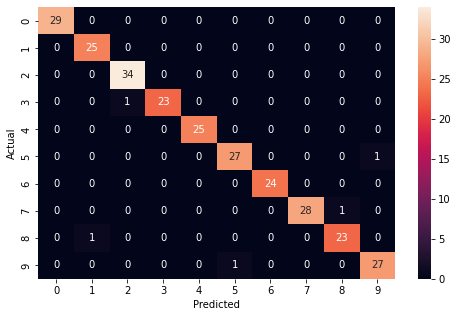

In [60]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(cf,annot=True,fmt=',d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [61]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_pred_new)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      1.00      0.98        25
           2       0.97      1.00      0.99        34
           3       1.00      0.96      0.98        24
           4       1.00      1.00      1.00        25
           5       0.96      0.96      0.96        28
           6       1.00      1.00      1.00        24
           7       1.00      0.97      0.98        29
           8       0.96      0.96      0.96        24
           9       0.96      0.96      0.96        28

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270



The test performance of SVM classifier increases from 0.977778 to 0.981481 when hyperparameter tuning is performed